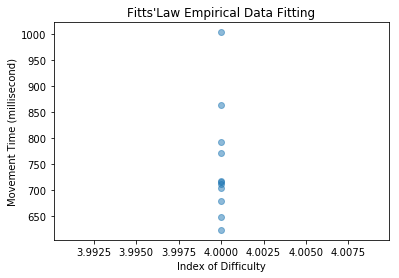

In [ ]:
# Aalto_EngineeringForHumans, 2 Fitts' Law GUI, 25.6.2017
# need Matplotlib package for empirical data visualization

import tkinter as tk
from tkinter import ttk
import time as tm
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import string

# input parameters
global counter
counter = 0
global counterMax
counterMax = 1
global timeStamp
timeStamp = 0
global timeStampTemp
timeStampTemp = 0
global timeDelta
timeDelta = 0
global areaWidth
areaWidth = 700
global widthValue
widthValue = 40
global distanceValue
distanceValue = 250.0
# does idValue need to be global?
global idValue
idValue = 4.0
global areaCornerWidth
areaCornerWidth = (areaWidth - widthValue*2 - distanceValue)/2
# list of Index of Difficulty
global idList
idList = []
# list of Movement Time
global mtList
mtList = []

def onScaleChanged(event):
    global widthValue
    global distanceValue
    global areaCornerWidth
    global idValue
    global idList
    #change the width of objects
    widthValue = int(varWidth.get())
    frameObj1.config(width=widthValue)
    frameObj2.config(width=widthValue)
    #change the distance between objects
    distanceValue = varDistance.get()
    areaCornerWidth = (areaWidth - widthValue*2 - distanceValue)/2
    frameDistance.config(width=distanceValue)
    frameNWCorner.config(width=areaCornerWidth)
    frameSWCorner.config(width=areaCornerWidth)
    frameNECorner.config(width=areaCornerWidth)
    frameSECorner.config(width=areaCornerWidth)
    idValue = np.log2(2*distanceValue/widthValue)
    #print (idValue)
    labelId.config(text="ID = %0.2f" %idValue)

def onStartClicked(event):
    global counter
    counter = 0
    global counterMax
    counterMax = int(entryCounter.get())
    entryCounter.config(state=tk.DISABLED)
    scaleWidth.config(state=tk.DISABLED)
    scaleDistance.config(state=tk.DISABLED)

def cursorMovement(event):
    global timeStamp
    global timeStampTemp
    global counter
    global idList
    global mtList
    if counter == 1:
        timeStampTemp = tm.clock()
    if counter >=2 and counter <= counterMax:
        # timing cursor one-way movement time in millisecond
        timeStamp = tm.clock()
        timeDelta = (timeStamp - timeStampTemp)*1000
        timeStampTemp = timeStamp
        mtList.append(timeDelta)
        mtArray = np.array(mtList)
        tk.Label(frameTime, text="time = %0.2f ms" %mtList[-1], anchor = tk.W).grid(row = 1 + counter, column=0, sticky=tk.N)
        idList.append(idValue)
        idArray = np.array(idList)
        # update data plot
        fig = plt.figure()
        graph = fig.add_subplot(111)
        graph.set(title="Fitts'Law Empirical Data Fitting", ylabel='Movement Time (millisecond)', xlabel='Index of Difficulty')
        graph.scatter(idList, mtList, alpha=0.5)
        display.clear_output(wait=True)
        plt.show()
        # counting cursor back-and-forth movement number of times
        labelPointingCounter.config(text="counter = %d" %counter)
    if counter > counterMax:
        obj1.bind("<Enter>", lambda event, h=obj1: h.configure(bg='#224147'))
        obj2.bind("<Enter>", lambda event, h=obj2: h.configure(bg='#224147'))
        obj1.config(state=tk.DISABLED)
        obj2.config(state=tk.DISABLED)
        #linear regression
        #z = np.polyfit(idList, mtList, 1)
        #f = np.poly1d(z)
        #print (f)
    counter += 1

def onResetClicked(event):
    global counter
    counter = 0
    entryCounter.config(state=tk.NORMAL)
    scaleWidth.config(state=tk.NORMAL)
    scaleDistance.config(state=tk.NORMAL)

# limit counter entry is only digit
def onValidate(d, S):
    if S in string.digits:
        return True
    else:
        return False

root = tk.Tk()
root.title("Fitts' Law: Empirical Experiment GUI")
root.resizable(width=False, height=False)
#experiment GUI
frameIdController = tk.Frame(root)
framePointingArea = tk.Frame(root, width=areaWidth, height=250, borderwidth=2, relief=tk.GROOVE)
frameTime = ttk.Labelframe(root, text='Delta Time', width=150, height=250)
frameIdController.grid(row=0, column=0, padx=10, pady=10, ipadx=10, ipady=10, sticky=tk.EW)
framePointingArea.grid(row=1, column=0, padx=10, pady=10, ipadx=10, ipady=10)
framePointingArea.grid_propagate(0)
frameTime.grid(row=0, column=1, rowspan=2, padx=10, pady=10, sticky=tk.NS)
frameTime.grid_propagate(0)

#width, distance controller
varWidth = tk.DoubleVar()
varWidth.set(widthValue)
varDistance = tk.DoubleVar()
varDistance.set(distanceValue)
scaleWidth = tk.Scale(frameIdController, from_=70, to=10, variable=varWidth, command=onScaleChanged)
scaleDistance = tk.Scale(frameIdController, from_=500, to=50, variable=varDistance, resolution=0.1, command=onScaleChanged)
labelWidth = tk.Label(frameIdController, text="Width")
labelDistance = tk.Label(frameIdController, text="Distance")
buttonStart = tk.Button(frameIdController, text="Start", padx=10, pady=10)
labelId = tk.Label(frameIdController, text="Index of Difficulty = %0.2f" %idValue)
labelCounter = tk.Label(frameIdController, text="Counter =")
vcmd = (frameIdController.register(onValidate), '%d', '%S')
textEntry = tk.StringVar()
entryCounter = tk.Entry(frameIdController, textvariable=textEntry, validate="key", validatecommand=vcmd)
labelCounterSuggestion = tk.Label(frameIdController, text="(Suggested counter: 6 - 12)")
buttonReset = tk.Button(frameIdController, text="Reset", padx=10, pady=10)
buttonReset.grid(row=0, column=0, rowspan=3, sticky=tk.SW)
scaleWidth.grid(row=0, column=1, rowspan=2, padx=10)
scaleDistance.grid(row=0, column=2, rowspan=2, padx=10)
labelWidth.grid(row=2, column=1)
labelDistance.grid(row=2, column=2)
labelId.grid(row=0, column=3, columnspan=3, padx=10, sticky=tk.EW)
labelCounter.grid(row=1, column=3, padx=10, sticky=tk.W)
entryCounter.grid(row=1, column=4, sticky=tk.EW)
labelCounterSuggestion.grid(row=2, column=3, sticky=tk.W)
buttonStart.grid(row=0, column=7, padx=10, sticky=tk.S)

#Pointing area
frameNWCorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameSWCorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameNECorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameSECorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameDistance = tk.Frame(framePointingArea, width=distanceValue, height=50)
frameObj1 = tk.Frame(framePointingArea, width=widthValue, height=50)
frameObj2 = tk.Frame(framePointingArea, width=widthValue, height=50)
obj1=tk.Button(frameObj1, bg='#224147')
obj2=tk.Button(frameObj2, bg='#224147')
labelPointingCounter=tk.Label(framePointingArea, text="counter = %d" %counter)
frameNWCorner.grid(row=0, column=0)
frameNECorner.grid(row=0, column=4)
frameObj1.grid(row=1, column=1)
frameObj1.rowconfigure(0, weight=1)
frameObj1.columnconfigure(0, weight=1)
frameObj1.grid_propagate(0)
obj1.grid(sticky=tk.NSEW)
frameDistance.grid(row=1, column=2)
frameDistance.grid_propagate(0)
frameObj2.grid(row=1, column=3)
frameObj2.rowconfigure(0, weight=1)
frameObj2.columnconfigure(0, weight=1)
frameObj2.grid_propagate(0)
obj2.grid(sticky=tk.NSEW)
frameSWCorner.grid(row=2, column=0)
frameSECorner.grid(row=2, column=4)
labelPointingCounter.grid(row=2, column=2)

#when cursor hover over button, button change colour
obj1.bind("<Enter>", lambda event, h=obj1: h.configure(bg='#6fccdd'))
obj1.bind("<Leave>", lambda event, h=obj1: h.configure(bg='#224147'))
obj1.bind("<Button-1>", cursorMovement)
obj2.bind("<Enter>", lambda event, h=obj2: h.configure(bg='#6fccdd'))
obj2.bind("<Leave>", lambda event, h=obj2: h.configure(bg='#224147'))
obj2.bind("<Button-1>", cursorMovement)
buttonStart.bind("<Button-1>", onStartClicked)
buttonReset.bind("<Button-1>", onResetClicked)

#empirical data fitting
global fig
fig = plt.figure()
global graph
graph = fig.add_subplot(111)
graph.set(title='An Example Axes', ylabel='Y', xlabel='X')
graph.plot(idList, mtList)

root.mainloop()


In [ ]:
string.digits